## 1.Visualització, histograma i contrast

In [29]:
import cv2
# Llegim la imatge en aquest cas la estem llegint en BGR
img = cv2.imread("BerkeleyTower.png") 
tamany = img.shape  #Tamany de la imatge
print(tamany)

#Mostrem la imatge amb els tres canals junts
cv2.imshow("Berkeley",img)
cv2.waitKey(0)       # El programa s'espera indefinidament fins que premem una tecla      
cv2.destroyAllWindows() # Tanquem totes les finestres

#les imatges es poden veure tant amb matplotlib com cv2
#anire canviant segons hagi de fer subplots o no

(499, 748, 3)


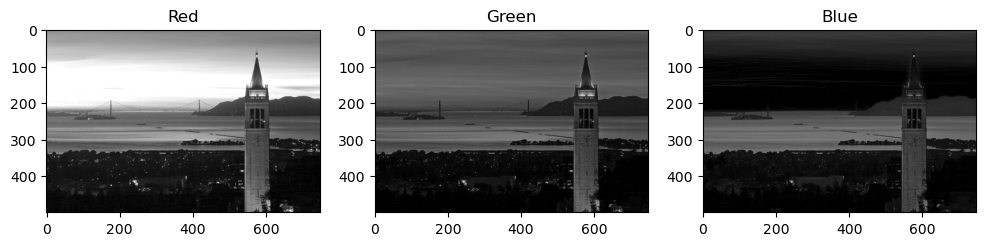

In [30]:
import matplotlib.pyplot as plt

#Creem una finestra nova per tal de poder controlar la mida 
plt.figure(figsize = (12,4))

#Separem la imatge en els tres canals
b,g,r = cv2.split(img)
#Visualtizem els tres canals per sepassrat
#posem cmap = "gray" perque imshow per defecte interpreta l'entrada com una imatge de 3 canals
#pero nomes és un en aquest cas per tant ho pasem en escala de grisos, és a dir, 1 canal
plt.subplot(1,3,1)
plt.imshow(r,cmap = "gray")
plt.title("Red")
plt.subplot(1,3,2)
plt.imshow(g,cmap = "gray")
plt.title("Green")
plt.subplot(1,3,3)
plt.imshow(b,cmap = "gray")
plt.title("Blue")
plt.show()

In [31]:
#A partir d'ara treballarem sempre amb imatges d'un unic canal

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow("Berkeley",img_gray)
cv2.waitKey(0)         
cv2.destroyAllWindows()

tamany_gray = img_gray.shape
print(tamany_gray)

(499, 748)


Ara que hem convertit la imatge en escala de grisos, quan trobem la mida de la imatge, a diferencia del cas anterior que ens retorna tres arguments: files, columnes i canals, ara ens retorna una tupla amb nomès dos arguments que son el nombre de files i columnes ja que el canal és únic al estar en escala de grisos.


### PREGUNTA 1.1 Indiqueu quina és la resolució espacial i de profunditat de la imatge 'img_gray'

Per saber la resolució espacial i la profunditat de la imatge necessitarem saber, el nombre de pixels d'altura i d'amplada i quants valors pot prendre cada pixel. Utilitzarem _.shape i _.dtype, els primer ens retorne el nombre de files de pixels i el nombre de columnes i el segon el tipus de píxel, és a dir, el rang de valors que pot prendre

In [32]:
tamany_gray = img_gray.shape
pixel_type = img_gray.dtype
print(f"Resolució espacial  = ({tamany_gray[1]},{tamany_gray[0]})")
print(f"Tipus de píxel = {pixel_type} -> Resolució de profunditat = (0,255)")

Resolució espacial  = (748,499)
Tipus de píxel = uint8 -> Resolució de profunditat = (0,255)


### Histograma


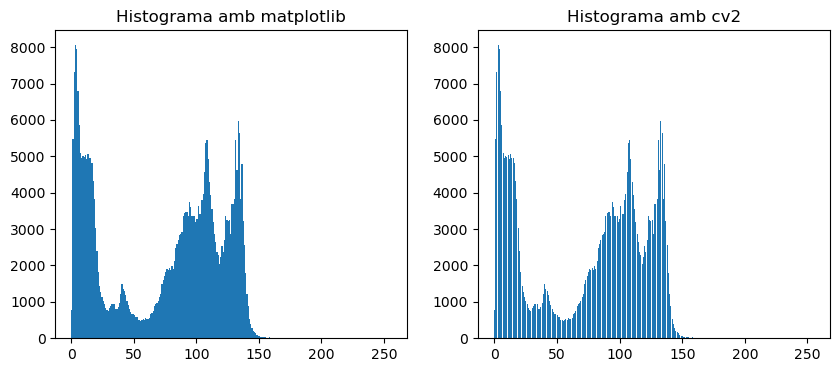

In [33]:
import numpy as np
hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])
#(imagte,canal,mascara --> none = histograma de tota la imatge,tamany del l'histograma, rang)


plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.title("Histograma amb matplotlib")
plt.hist(img_gray.flatten(),256,[0,256],density=False)
plt.subplot(1,2,2)
plt.title("Histograma amb cv2")
plt.bar(np.arange(0,256,1),hist.flatten())
plt.show()

### Canvis lineals

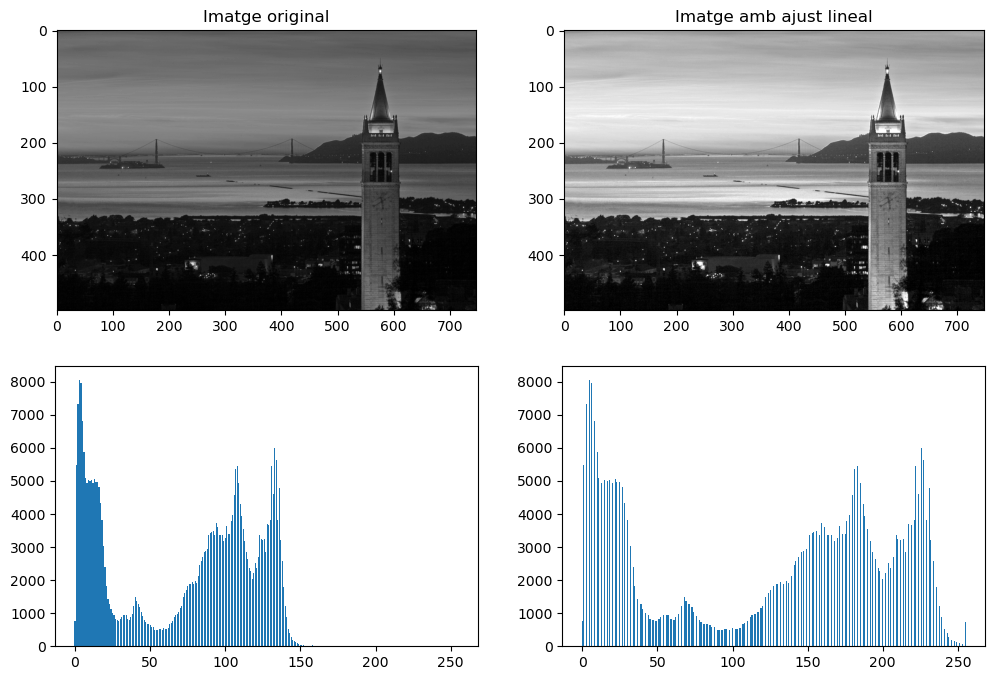

In [34]:
from skimage import exposure
# exposure.rescale_intensity és una eina per fer ajustos lineals amb imatges
#li donem una imatge amb un range d'entrada,
#on estan acomulats la majoria de pixels
#tambe li donem el rang on volem que reescali els valors 
linadj_img = exposure.rescale_intensity(img_gray, in_range=(0, 150), out_range=(0, 255))
#la iamtge que ens retorna pot tenir pixels tipus float64 i volem que sigui uint8
linadj_img = linadj_img.astype(np.uint8)

histadj = cv2.calcHist([linadj_img],[0],None,[256],[0,256])

plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.title("Imatge original")
plt.imshow(img_gray,cmap = "gray")
plt.subplot(2,2,2)
plt.title("Imatge amb ajust lineal")
plt.imshow(linadj_img,cmap = "gray")
plt.subplot(2,2,3)
plt.bar(np.arange(0,256,1),hist.flatten())
plt.subplot(2,2,4)
plt.bar(np.arange(0,256,1),histadj.flatten())
plt.show()

### Equalització histograma

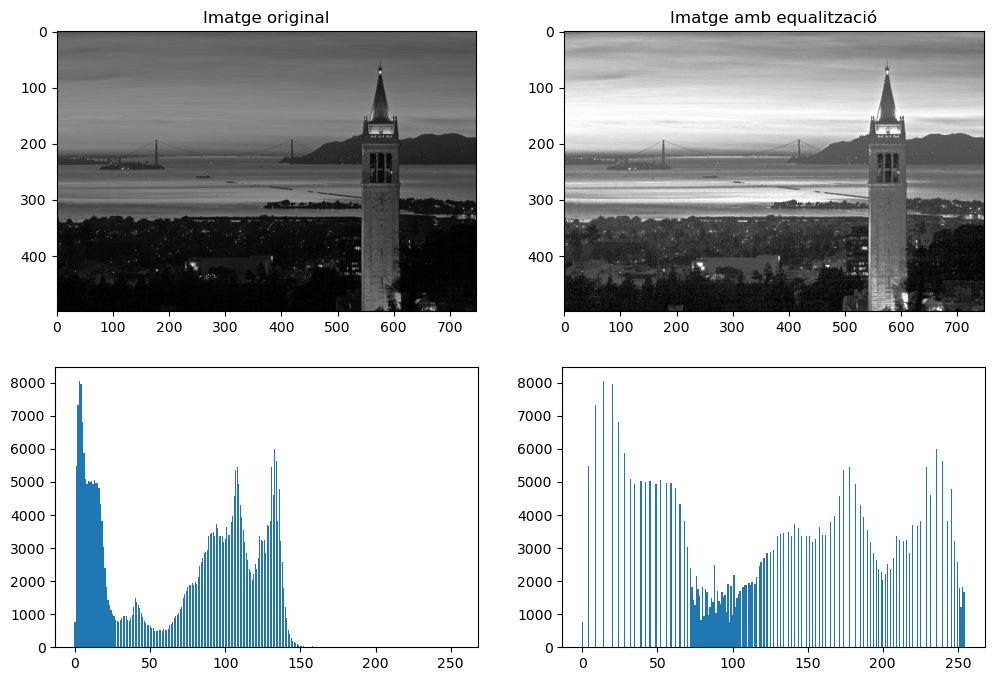

In [35]:
import math
#metode de la presentació
prob = hist/sum(hist)  # probabilitat de tenir cada pixel
cumprob = np.cumsum(prob) # probabilitat acummulada
CP255 = 255*cumprob # rescalem a tot el rang
floor_rounding = np.array([math.floor(i) for i in CP255]) #arodonim cap abaix
eqimg = floor_rounding[img_gray] # reemplacem cada valor de la imatge original pel valor nou que li correspon
eqimg = eqimg.astype(np.uint8)

histeq = cv2.calcHist([eqimg],[0],None,[256],[0,256])

plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.title("Imatge original")
plt.imshow(img_gray,cmap = "gray")
plt.subplot(2,2,2)
plt.title("Imatge amb equalització")
plt.imshow(eqimg,cmap = "gray")
plt.subplot(2,2,3)
plt.bar(np.arange(0,256,1),hist.flatten())
plt.subplot(2,2,4)
plt.bar(np.arange(0,256,1),histeq.flatten())
plt.show()


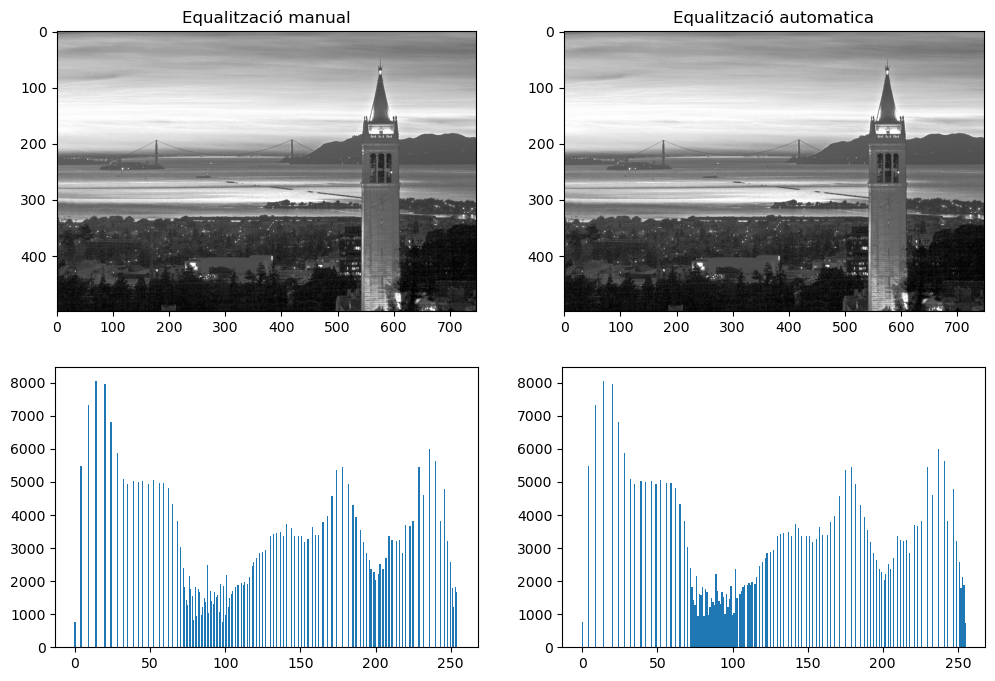

In [36]:
# metode de cv2
#directament retorna la imatge amb l'equalització
equ = cv2.equalizeHist(img_gray)
histeqcv = cv2.calcHist([equ],[0],None,[256],[0,256])

plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.title("Equalització manual")
plt.imshow(eqimg,cmap = "gray")
plt.subplot(2,2,2)
plt.title("Equalització automatica")
plt.imshow(equ,cmap = "gray")
plt.subplot(2,2,3)
plt.bar(np.arange(0,256,1),histeq.flatten())
plt.subplot(2,2,4)
plt.bar(np.arange(0,256,1),histeqcv.flatten())
plt.show()

### PREGUNTA 1.2 Experimenteu amb les modificacins de l'histograma utilitzant l'imatge 'Unequalized_Hawkes_Bay_NZ'

In [37]:
img2 = cv2.imread("Unequalized_Hawkes_Bay_NZ.jpg")
size = img2.shape
print(size)#---> no està en escala de grisos

(200, 300, 3)


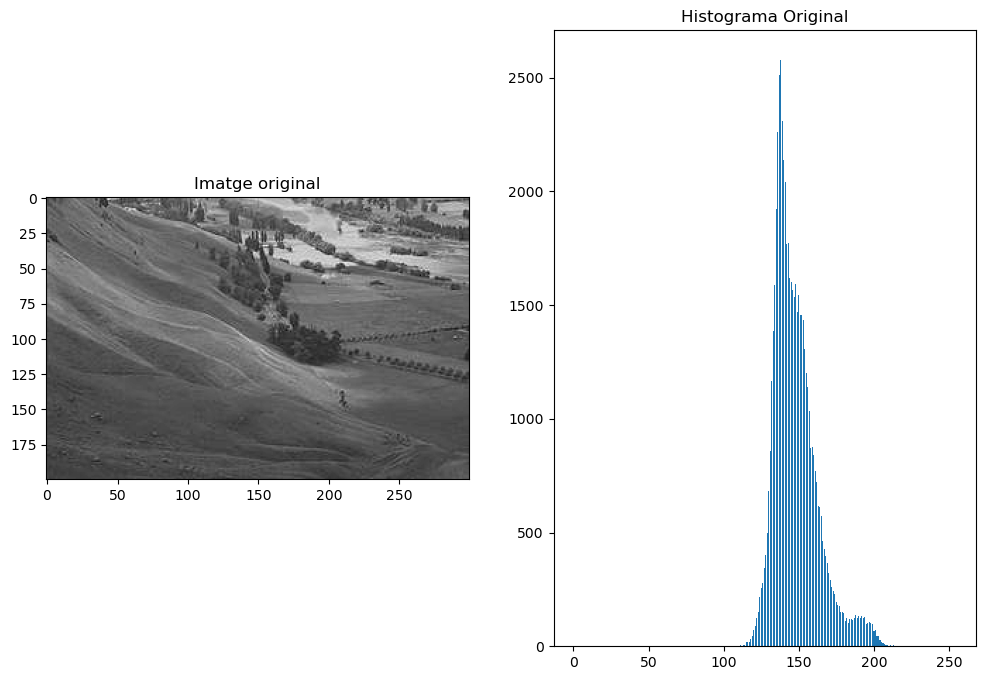

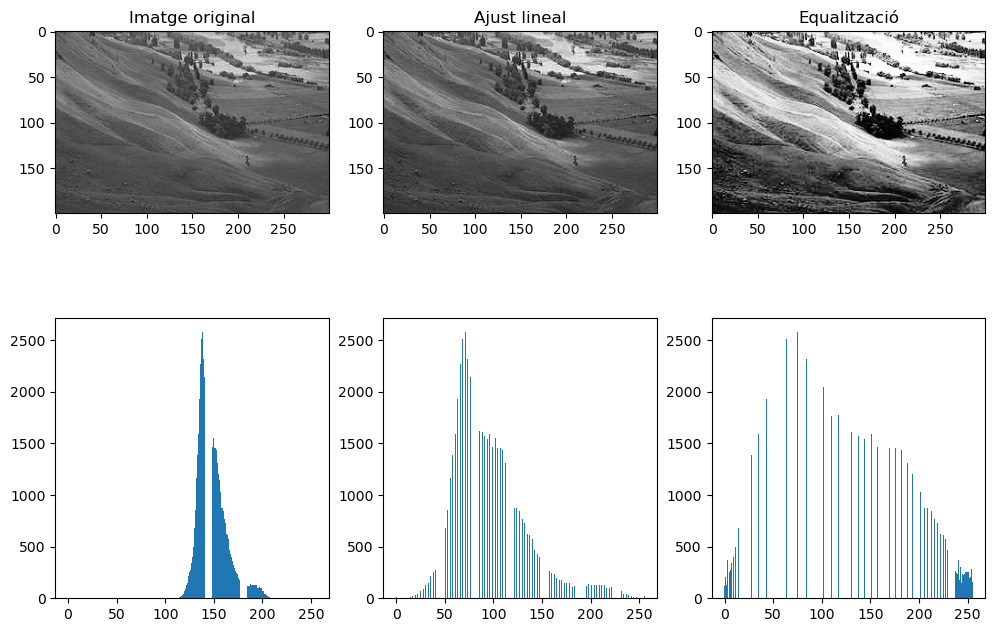

In [38]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#necessitem saber en quin rang estan agrupats els pixels
hist2 = cv2.calcHist([img2_gray],[0],None,[256],[0,256])
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title("Imatge original")
plt.imshow(img2_gray,cmap="gray")
plt.subplot(1,2,2)
plt.title("Histograma Original")
plt.bar(np.arange(0,256,1),hist2.flatten())



linadj_img2 = exposure.rescale_intensity(img2_gray, in_range=(110, 210), out_range=(0, 255))
linadj_img2 = linadj_img2.astype(np.uint8)
histadj2 = cv2.calcHist([linadj_img2],[0],None,[256],[0,256])

equ2 = cv2.equalizeHist(img2_gray)
histeq2 = cv2.calcHist([equ2],[0],None,[256],[0,256])

plt.figure(figsize = (12,8))
plt.subplot(2,3,1)
plt.title("Imatge original")
plt.imshow(img2_gray,cmap = "gray")
plt.subplot(2,3,2)
plt.title("Ajust lineal")
plt.imshow(linadj_img2,cmap = "gray")
plt.subplot(2,3,3)
plt.title("Equalització")
plt.imshow(equ2,cmap = "gray")
plt.subplot(2,3,4)
plt.bar(np.arange(0,256,1),hist2.flatten())
plt.subplot(2,3,5)
plt.bar(np.arange(0,256,1),histadj2.flatten())
plt.subplot(2,3,6)
plt.bar(np.arange(0,256,1),histeq2.flatten())
plt.show()

## 2. Filtres

### Filtre pas baix

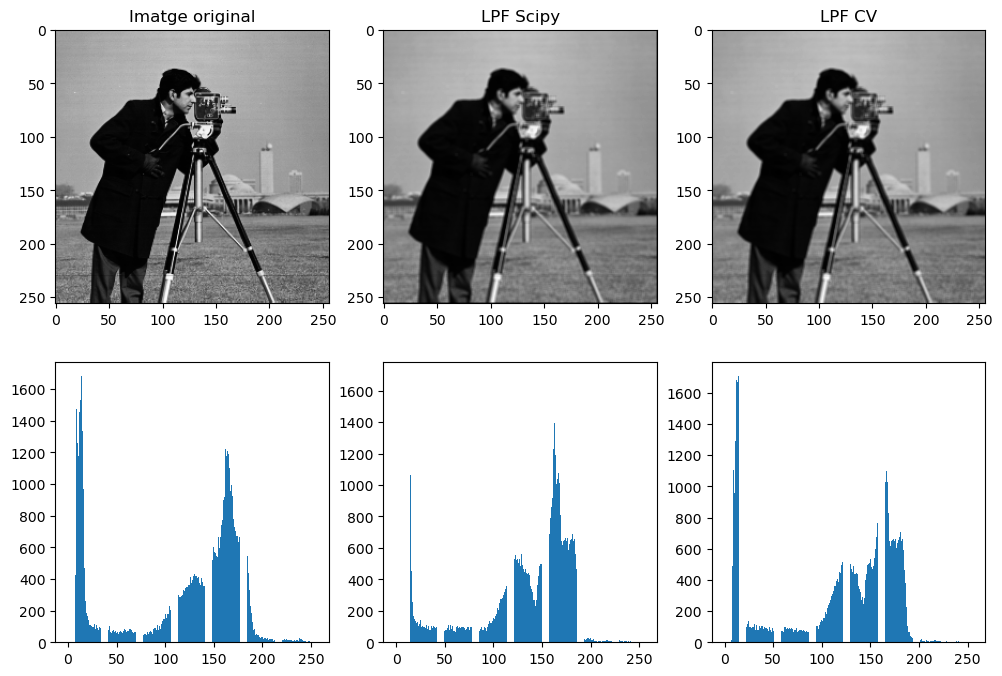

In [39]:
import scipy as sc

img3 = cv2.imread("cameraman.tif")
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

#com que utilitzarem decimals, canviem el tipus a float64

img3_gray = img3_gray.astype(np.float64)


kernel = np.ones((3,3),np.float64)/9

#Scipy
# mode=same per tenir l'output del mateix size que l'input
#quan tractem cantonades genera problemes a la convolució, ja que falten pixels
#boundary=fill omple els pixels que falten amb fillvalue=0
lpfimg3SC = sc.signal.convolve2d(img3_gray, kernel, mode='same', boundary='fill', fillvalue=0) 

#CV2
#imatge d'entrada, ddepth, kernel
#-1 indica que l'imatge de sortida tindrà la mateixa profunditat que la d'entrada
lpfimg3CV = cv2.filter2D(img3_gray, -1, kernel)

#tornem a uint8

lpfimg3CV = lpfimg3CV.astype(np.uint8)
lpfimg3SC = lpfimg3SC.astype(np.uint8)
img3_gray = img3_gray.astype(np.uint8)

hist3 = cv2.calcHist([img3_gray],[0],None,[256],[0,256])
histlpfCV = cv2.calcHist([lpfimg3CV],[0],None,[256],[0,256])
histlpfSC = cv2.calcHist([lpfimg3SC],[0],None,[256],[0,256])

plt.figure(figsize = (12,8))
plt.subplot(2,3,1)
plt.title("Imatge original")
plt.imshow(img3_gray,cmap = "gray")
plt.subplot(2,3,2)
plt.title("LPF Scipy")
plt.imshow(lpfimg3SC,cmap = "gray")
plt.subplot(2,3,3)
plt.title("LPF CV")
plt.imshow(lpfimg3CV,cmap = "gray")
plt.subplot(2,3,4)
plt.bar(np.arange(0,256,1),hist3.flatten())
plt.subplot(2,3,5)
plt.bar(np.arange(0,256,1),histlpfSC.flatten())
plt.subplot(2,3,6)
plt.bar(np.arange(0,256,1),histlpfCV.flatten())
plt.show()


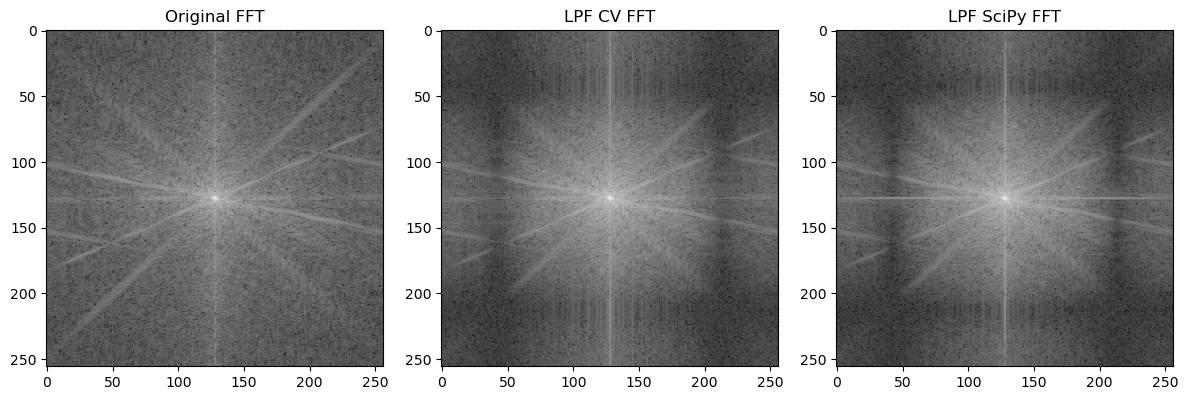

In [40]:
#transformada de fourier de cada imatge
original = sc.fft.fft2(img3_gray)
lpfCV = sc.fft.fft2(lpfimg3CV)
lpfSC = sc.fft.fft2(lpfimg3SC)
#fem que els valors de freqüencia 0 esiguin al centre
original = sc.fft.fftshift(original)
lpfCV = sc.fft.fftshift(lpfCV)
lpfSC = sc.fft.fftshift(lpfSC)

#fem np.abs() per convertir els valors en la seva magnitud real
#np.log1p = log(1+x) per evitar tenir logaritmes de 0 i per veure millor els canvis de freqüencia

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(np.log1p(np.abs(original)), cmap="gray")
plt.title("Original FFT")

plt.subplot(1, 3, 2)
plt.imshow(np.log1p(np.abs(lpfCV)), cmap="gray")
plt.title("LPF CV FFT")

plt.subplot(1, 3, 3)
plt.imshow(np.log1p(np.abs(lpfSC)), cmap="gray")
plt.title("LPF SciPy FFT")

plt.tight_layout()
plt.show()


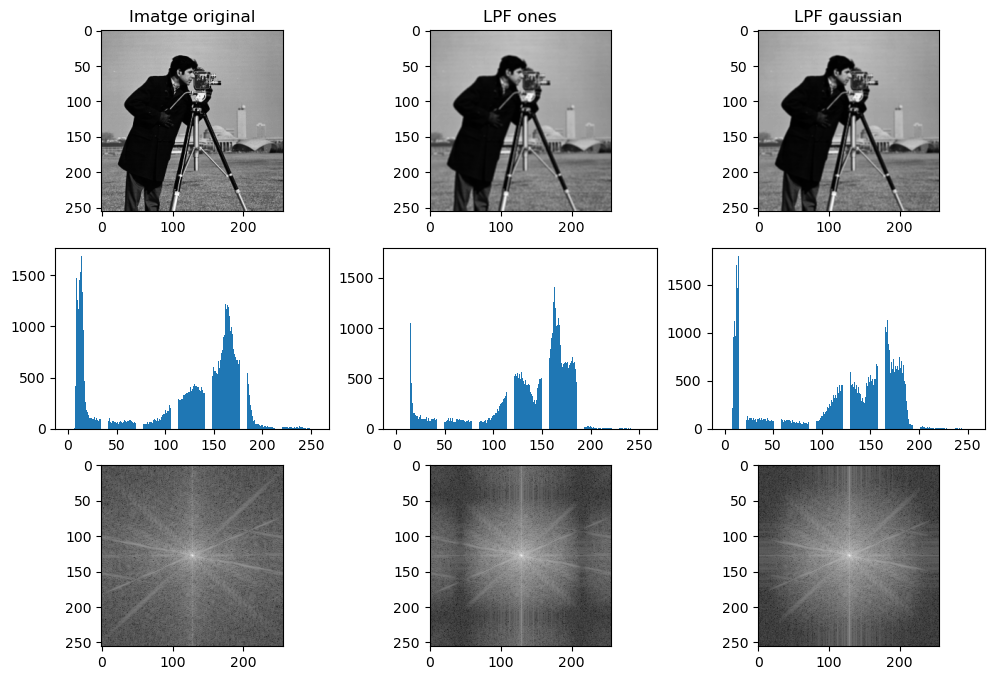

In [41]:
kernel2 = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
lpfimg3CV2 = cv2.filter2D(img3_gray, -1, kernel2)

histlpfCV2 = cv2.calcHist([lpfimg3CV2],[0],None,[256],[0,256])
lpfCV2 = sc.fft.fft2(lpfimg3CV2)
lpfCV2 = sc.fft.fftshift(lpfCV2)
plt.figure(figsize = (12,8))
plt.subplot(3,3,1)
plt.title("Imatge original")
plt.imshow(img3_gray,cmap = "gray")
plt.subplot(3,3,2)
plt.title("LPF ones")
plt.imshow(lpfimg3CV,cmap = "gray")
plt.subplot(3,3,3)
plt.title("LPF gaussian")
plt.imshow(lpfimg3CV2,cmap = "gray")
plt.subplot(3,3,4)
plt.bar(np.arange(0,256,1),hist3.flatten())
plt.subplot(3,3,5)
plt.bar(np.arange(0,256,1),histlpfCV.flatten())
plt.subplot(3,3,6)
plt.bar(np.arange(0,256,1),histlpfCV2.flatten())
plt.subplot(3,3,7)
plt.imshow(np.log1p(np.abs(original)), cmap="gray")
plt.subplot(3,3,8)
plt.imshow(np.log1p(np.abs(lpfCV)), cmap="gray")
plt.subplot(3,3,9)
plt.imshow(np.log1p(np.abs(lpfCV2)), cmap="gray")
plt.show()
plt.show()

### Filtre passa alt

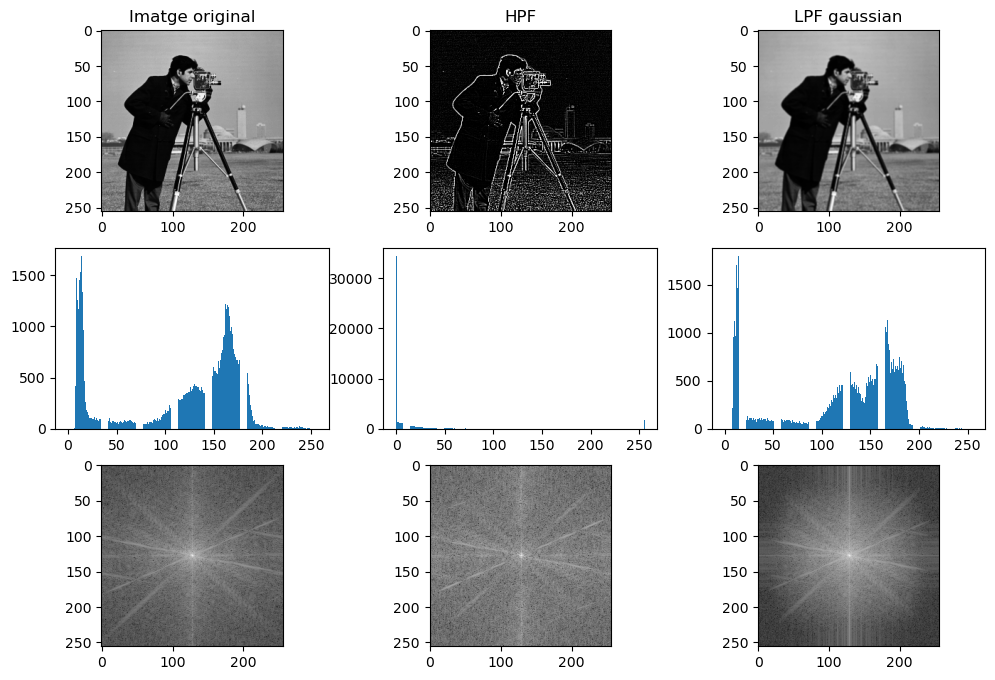

In [42]:
kernel3 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
hpfimg3CV = cv2.filter2D(img3_gray,-1,kernel3)

histhpfCV = cv2.calcHist([hpfimg3CV],[0],None,[256],[0,256])
hpfCV = sc.fft.fft2(hpfimg3CV)
hpfCV = sc.fft.fftshift(hpfCV)

plt.figure(figsize = (12,8))
plt.subplot(3,3,1)
plt.title("Imatge original")
plt.imshow(img3_gray,cmap = "gray")
plt.subplot(3,3,2)
plt.title("HPF")
plt.imshow(hpfimg3CV,cmap = "gray")
plt.subplot(3,3,3)
plt.title("LPF gaussian")
plt.imshow(lpfimg3CV2,cmap = "gray")
plt.subplot(3,3,4)
plt.bar(np.arange(0,256,1),hist3.flatten())
plt.subplot(3,3,5)
plt.bar(np.arange(0,256,1),histhpfCV.flatten())
plt.subplot(3,3,6)
plt.bar(np.arange(0,256,1),histlpfCV2.flatten())
plt.subplot(3,3,7)
plt.imshow(np.log1p(np.abs(original)), cmap="gray")
plt.subplot(3,3,8)
plt.imshow(np.log1p(np.abs(hpfCV)), cmap="gray")
plt.subplot(3,3,9)
plt.imshow(np.log1p(np.abs(lpfCV2)), cmap="gray")
plt.show()
plt.show()

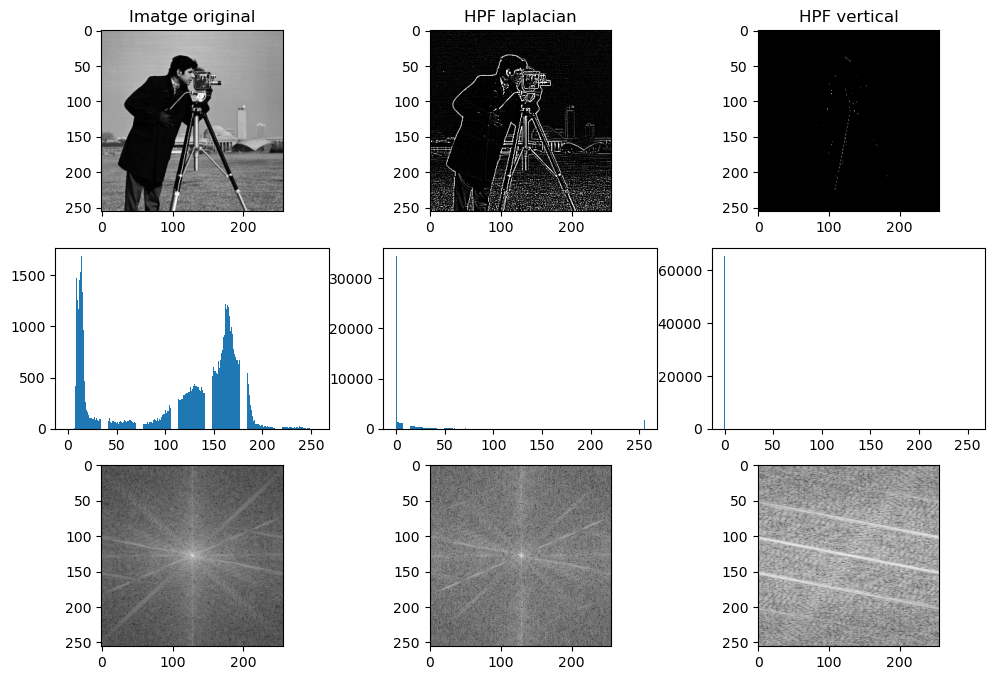

In [43]:
kernel4 = np.array([[-1,1,0],[-1,1,0],[-1,-1,-1]])
hpfimg3CV2 = cv2.filter2D(img3_gray,-1,kernel4)

histhpfCV2 = cv2.calcHist([hpfimg3CV2],[0],None,[256],[0,256])
hpfCV2 = sc.fft.fft2(hpfimg3CV2)
hpfCV2 = sc.fft.fftshift(hpfCV2)

plt.figure(figsize = (12,8))
plt.subplot(3,3,1)
plt.title("Imatge original")
plt.imshow(img3_gray,cmap = "gray")
plt.subplot(3,3,2)
plt.title("HPF laplacian")
plt.imshow(hpfimg3CV,cmap = "gray")
plt.subplot(3,3,3)
plt.title("HPF vertical")
plt.imshow(hpfimg3CV2,cmap = "gray")
plt.subplot(3,3,4)
plt.bar(np.arange(0,256,1),hist3.flatten())
plt.subplot(3,3,5)
plt.bar(np.arange(0,256,1),histhpfCV.flatten())
plt.subplot(3,3,6)
plt.bar(np.arange(0,256,1),histhpfCV2.flatten())
plt.subplot(3,3,7)
plt.imshow(np.log1p(np.abs(original)), cmap="gray")
plt.subplot(3,3,8)
plt.imshow(np.log1p(np.abs(hpfCV)), cmap="gray")
plt.subplot(3,3,9)
plt.imshow(np.log1p(np.abs(hpfCV2)), cmap="gray")
plt.show()


### PREGUNTA 1.3 Proveu altres filtres creant diferents matrius

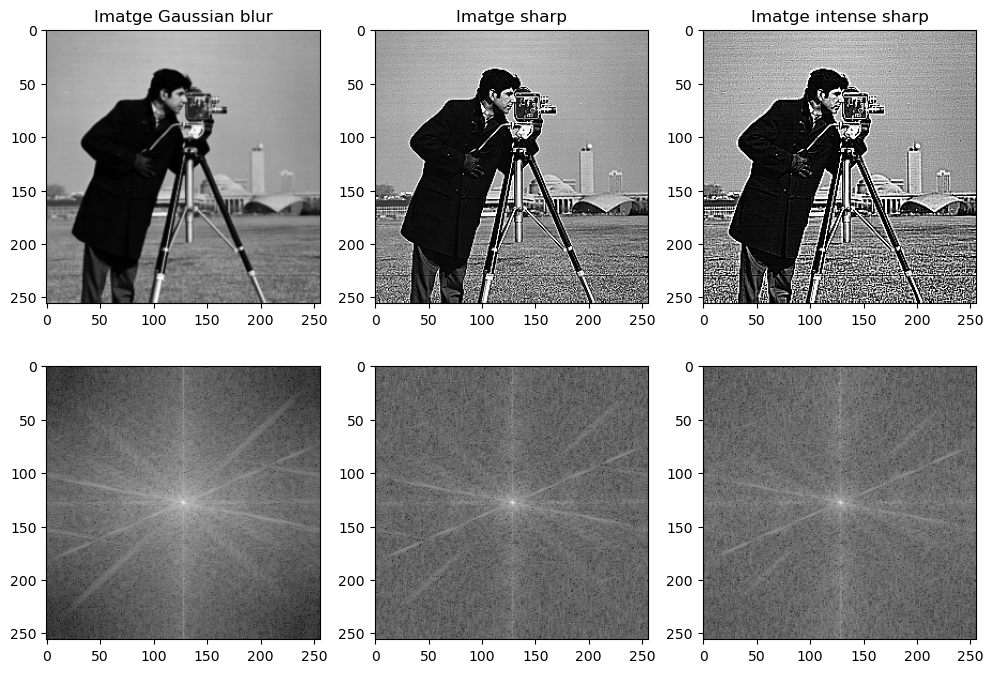

In [44]:
gaussian_blur = np.array([[0,1,0],[1,4,1],[0,1,0]])/8
sharp = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
intense_sharp = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

gaussian_blurimg = cv2.filter2D(img3_gray,-1,gaussian_blur)
sharpimg = cv2.filter2D(img3_gray,-1,sharp)
intense_sharpimg = cv2.filter2D(img3_gray,-1,intense_sharp)

fftblur = sc.fft.fft2(gaussian_blurimg)
fftblur = sc.fft.fftshift(fftblur)
fftsharp = sc.fft.fft2(sharpimg)
fftsharp = sc.fft.fftshift(fftsharp)
fftintense = sc.fft.fft2(intense_sharpimg)
fftintense = sc.fft.fftshift(fftintense)

plt.figure(figsize = (12,8))
plt.subplot(2,3,1)
plt.title("Imatge Gaussian blur")
plt.imshow(gaussian_blurimg,cmap = "gray")
plt.subplot(2,3,2)
plt.title("Imatge sharp")
plt.imshow(sharpimg,cmap = "gray")
plt.subplot(2,3,3)
plt.title("Imatge intense sharp")
plt.imshow(intense_sharpimg,cmap = "gray")
plt.subplot(2,3,4)
plt.imshow(np.log1p(np.abs(fftblur)), cmap="gray")
plt.subplot(2,3,5)
plt.imshow(np.log1p(np.abs(fftsharp)), cmap="gray")
plt.subplot(2,3,6)
plt.imshow(np.log1p(np.abs(fftintense)), cmap="gray")
plt.show()
plt.show()


### Filtre de mediana

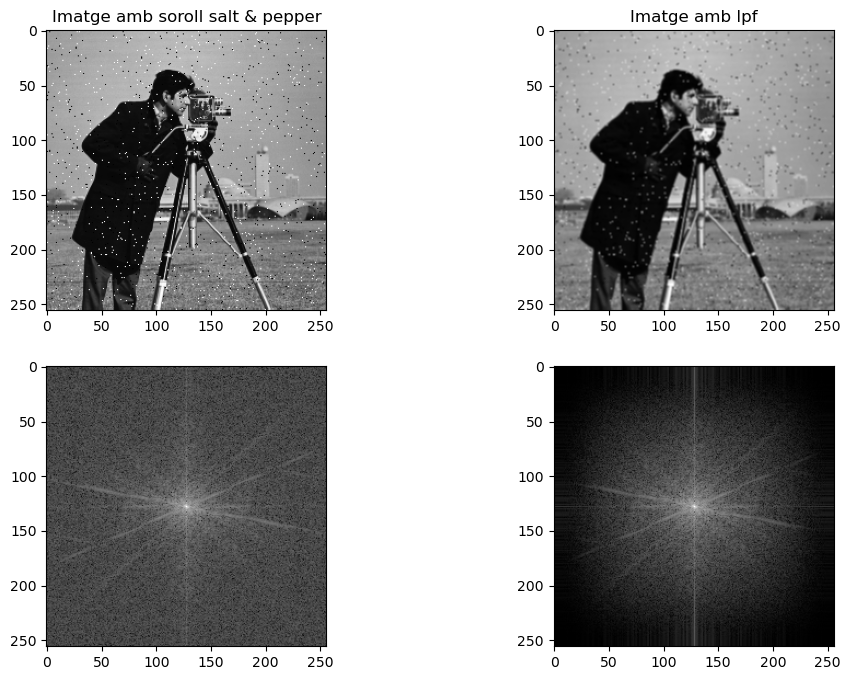

In [45]:
import skimage as sk
#agafem una imatge i li afegim soroll
img3_spnoise = sk.util.random_noise(img3_gray,mode = "s&p",amount = 0.02)
img3_spnoise_lpf = cv2.filter2D(img3_spnoise,-1,kernel2)
fft_spnoise = sc.fft.fft2(img3_spnoise)
fft_spnoise = sc.fft.fftshift(fft_spnoise)

fft_spnoise_lpf = sc.fft.fft2(img3_spnoise_lpf)
fft_spnoise_lpf = sc.fft.fftshift(fft_spnoise_lpf)

plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.title("Imatge amb soroll salt & pepper")
plt.imshow(img3_spnoise,cmap = "gray")
plt.subplot(2,2,2)
plt.title("Imatge amb lpf")
plt.imshow(img3_spnoise_lpf,cmap = "gray")
plt.subplot(2,2,3)
plt.imshow(np.log1p(np.abs(fft_spnoise)),cmap = "gray")
plt.subplot(2,2,4)
plt.imshow(np.log1p(np.abs(fft_spnoise_lpf)),cmap = "gray")
plt.show()

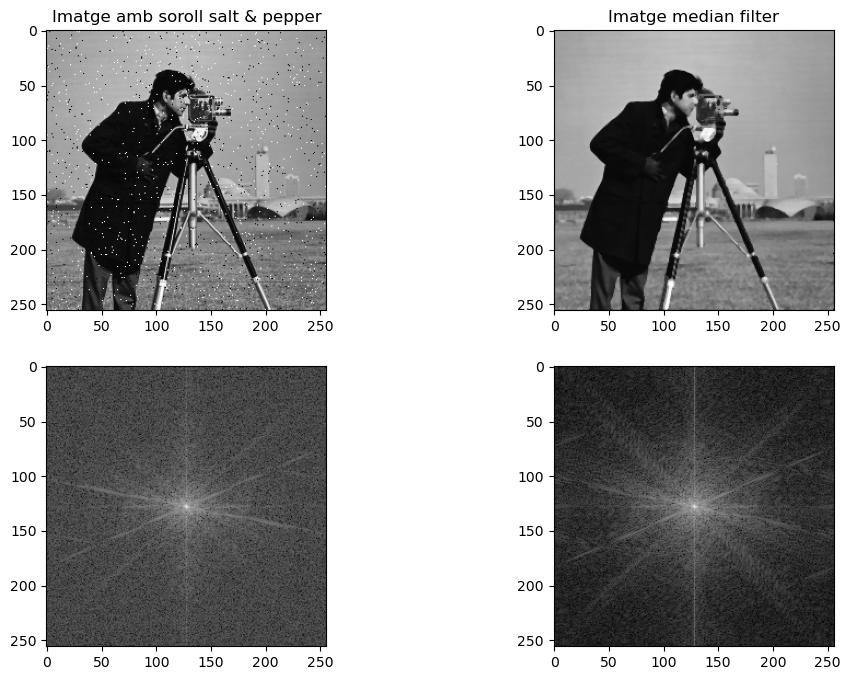

In [46]:

img3_spnoise_lpf2 = sc.signal.medfilt2d(img3_spnoise)

fft_spnoise_lpf2 = sc.fft.fft2(img3_spnoise_lpf2)
fft_spnoise_lpf2 = sc.fft.fftshift(fft_spnoise_lpf2)

plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.title("Imatge amb soroll salt & pepper")
plt.imshow(img3_spnoise,cmap = "gray")
plt.subplot(2,2,2)
plt.title("Imatge median filter")
plt.imshow(img3_spnoise_lpf2,cmap = "gray")
plt.subplot(2,2,3)
plt.imshow(np.log1p(np.abs(fft_spnoise)),cmap = "gray")
plt.subplot(2,2,4)
plt.imshow(np.log1p(np.abs(fft_spnoise_lpf2)),cmap = "gray")
plt.show()

### PREGUNTA 1.4 Canvieu el nivell de soroll i el kernel del filtre

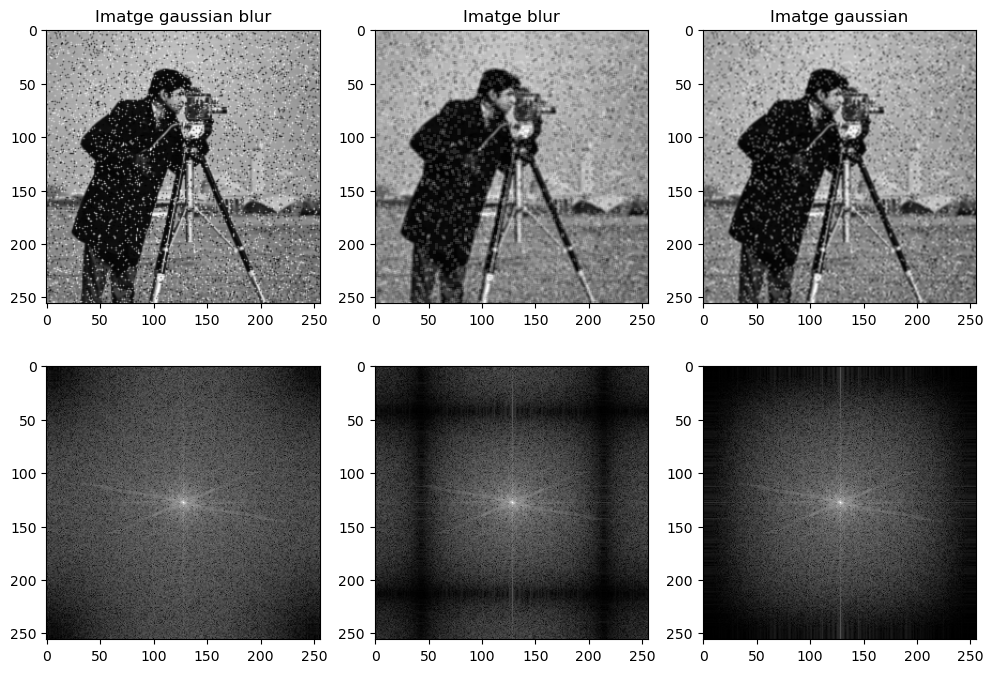

In [56]:
img3_spnoise2 = sk.util.random_noise(img3_gray,mode = "s&p",amount = 0.1)
gaussian_blur = np.array([[0,1,0],[1,4,1],[0,1,0]])/8
kernel = np.ones((3,3),np.float64)/9
kernel2 = np.array([[1,2,1],[2,4,2],[1,2,1]])/16

gaussian_blurimg = cv2.filter2D(img3_spnoise2 ,-1,gaussian_blur)
blurimg = cv2.filter2D(img3_spnoise2 ,-1,kernel)
gaussianimg = cv2.filter2D(img3_spnoise2 ,-1,kernel2)

fftgb = sc.fft.fft2(gaussian_blurimg)
fftgb = sc.fft.fftshift(fftgb)
fftb = sc.fft.fft2(blurimg)
fftb = sc.fft.fftshift(fftb)
fftg = sc.fft.fft2(gaussianimg)
fftg = sc.fft.fftshift(fftg)

plt.figure(figsize = (12,8))
plt.subplot(2,3,1)
plt.title("Imatge gaussian blur")
plt.imshow(gaussian_blurimg,cmap = "gray")
plt.subplot(2,3,2)
plt.title("Imatge blur")
plt.imshow(blurimg,cmap = "gray")
plt.subplot(2,3,3)
plt.title("Imatge gaussian")
plt.imshow(gaussianimg,cmap = "gray")
plt.subplot(2,3,4)
plt.imshow(np.log1p(np.abs(fftgb)), cmap="gray")
plt.subplot(2,3,5)
plt.imshow(np.log1p(np.abs(fftb)), cmap="gray")
plt.subplot(2,3,6)
plt.imshow(np.log1p(np.abs(fftg)), cmap="gray")
plt.show()
plt.show()